In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
import astropy as ap
import time

In [68]:
pi = np.pi
earth_mass = 5.972*(10**24) # Earth Mass, kg
earth_rotation = 23.9333 # Earth Rotation Period, hours
earth_orbit = 365.2422 # Earth Orbital Period, days
earth_radius = 6378 # Earth Radius, km
phi = 23.5 * pi/180 # Earth's Axial Tilt in degrees, converted to radians
theta = 35.0 # angle from the level of Moon's orbit on Earth, degrees (must be subtracted from Earth's own axial tilt)
#t is the ellapsed time, ellapsed from set point, in hours/seconds
omega = 0.262 # rad/hr radial velocity of Earth
G = (6.67428*(10**-11)*(3600**2))/(1000**3) # Convert to correct units!!
g = (9.81*(3600**2))/(1000) #Converts from m/s^2 to km/hr^2

moon_mass = 7.348*(10**22) # Moon Mass, kg
moon_orbit = 27.2917 # Moon Orbital Period, days
moon_apogee = 405696 # Earth-Center-Moon Apogee, km
moon_perigee = 363300 # Earth-Center-Moon Perigee, km

sun_mass = 1.989*(10**30) # Sun Mass, kg
earth_aphelion = 152097701 # Earth-Sun Aphelion, km
earth_perihelion = 147098074 # Earth-Sun Perihelion, km

earth_sun_amplitude =  (earth_aphelion-earth_perihelion)/(2) # Earth-Sun Amplitude, km
earth_moon_amplitude =  (moon_apogee-moon_perigee)/(2) # Earth-Moon Amplitude, km

alloted_time = earth_rotation
# alloted_time = earth_rotation*earth_orbit

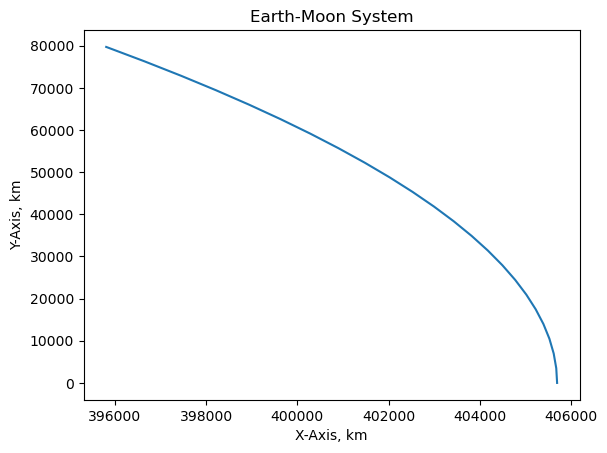

In [69]:
t = np.arange(0,alloted_time)
earth_moon_distanceX = (moon_apogee)*np.cos((2*pi*t)/(earth_rotation*moon_orbit)) # X component of Earth-Moon distance
earth_moon_distanceY = (moon_perigee)*np.sin((2*pi*t)/(earth_rotation*moon_orbit)) # Y component of Earth-Moon distance
earth_moon_distance = ((earth_moon_distanceX)**2) + ((earth_moon_distanceY)**2) # Earth-Center-Moon Distance

plt.figure()
plt.plot(earth_moon_distanceX, earth_moon_distanceY, label="Moon Orbit")
# plt.plot(C_mX, C_mY, label="Earth Orbit")
plt.xlabel("X-Axis, km")
plt.ylabel("Y-Axis, km")
# plt.legend
plt.title("Earth-Moon System")
plt.show()

In [53]:
# C_m = (M_m*D_Em)/(M_m + M_E) # Earth-Center-Moon Center of Mass, km
# C_mX = (C_m)*np.cos((2*pi*t)/(P_E*T_m))
# C_mY = (C_m)*np.sin((2*pi*t)/(P_E*T_m))

# plt.figure()
# plt.plot(C_mX, C_mY, label="Earth Orbit")
# plt.xlabel("X-Axis, km")
# plt.ylabel("Y-Axis, km")
# plt.title("Earth Orbiting Around center of mass between Moon and Earth")
# plt.show()

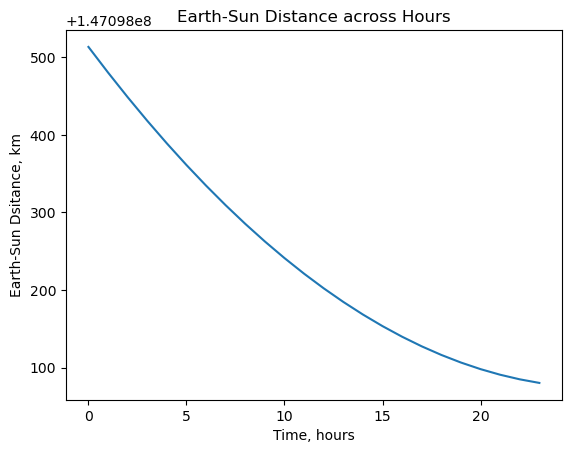

In [70]:
earth_sun_distance = (earth_sun_amplitude)*np.cos((2*(pi)*t)/(earth_rotation*earth_orbit) + pi - ((2*pi)/(earth_rotation*14))) + (earth_aphelion-earth_sun_amplitude) 
# The Sun does exert some tides on the Earth, so it will be helpful here. Measures the start of the year (two weeks before perihelion)

plt.figure()
plt.plot(t, earth_sun_distance)
plt.xlabel("Time, hours")
plt.ylabel("Earth-Sun Dsitance, km")
plt.title("Earth-Sun Distance across Hours")
plt.show()

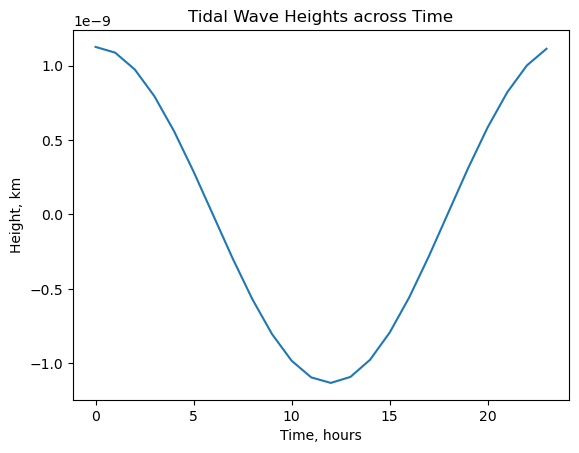

In [71]:
tidal_wave_height_by_moon = (3*G*moon_mass*(earth_radius**2))/(2*g*(earth_moon_distance**2))*np.cos((2*(pi)*t)/(earth_rotation))
tidal_wave_height_by_sun = (3*G*sun_mass*(earth_radius**2))/(2*g*(earth_sun_distance**2))*np.cos((2*(pi)*t)/(earth_rotation))
#Create equation that mimics the forces felt on Earth rotating, including from the sun as well. Must be some cosine function. MUST!!
# In this current configuration, it assumes a non-rotating earth, with a monthly high and low tide. Of course, this isn't how it works, so let's fix it.
# Also convert this system from hours to days instead?

plt.figure()
plt.plot(t, tidal_wave_height_by_moon)
plt.xlabel("Time, hours")
plt.ylabel("Height, km")
plt.title("Tidal Wave Heights across Time")
plt.show()